In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import itertools


In [2]:
df = pd.read_csv("tough_dataset.csv")
backup = df

In [3]:
df.shape

(2946, 69)

In [4]:
"""
pd.options.display.max_columns = None
pd.options.display.max_rows = None
"""


'\npd.options.display.max_columns = None\npd.options.display.max_rows = None\n'

In [5]:
df.columns

Index(['id', 'Target A', 'Target B', 'LOAN_AMT', 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift',
       'Residency Requirement', 'Posting Date', 'Posting Updated',
       'Process Date', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'HopeFiveYears',
       'JobSearchStatus', 'LastNewJob', 'UpdateCV', 'CommunicationTools',
       'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes',
       'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1',
       'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',
       'VersionControl

In [6]:
df.describe()

,id,Target A,Target B,LOAN_AMT,dti,last_pymnt_amnt
count,2.946000e+03,2946.000000,2946.000000,2946.000000,2946.000000,2946.000000
mean,6.830623e+07,58904.139794,0.210115,15345.663612,19.444117,4663.227026
std,1.814269e+06,26986.575936,0.407460,8636.391303,8.628543,6855.297610
min,3.617740e+05,0.000000,0.000000,1000.000000,0.000000,0.030000
25%,6.837622e+07,49390.000000,0.000000,8681.250000,13.035000,362.980000
50%,6.846507e+07,58440.000000,0.000000,14400.000000,18.905000,842.235000
75%,6.853764e+07,73171.750000,0.000000,20000.000000,25.580000,6832.185000
max,6.861706e+07,218587.000000,1.000000,35000.000000,51.200000,35467.750000


In [7]:
df.isnull().any()

id                           False
Target A                     False
Target B                     False
LOAN_AMT                     False
Business Title               False
Civil Service Title          False
Division/Work Unit           False
Job Description              False
Minimum Qual Requirements     True
Preferred Skills              True
Additional Information        True
To Apply                      True
Hours/Shift                   True
Residency Requirement         True
Posting Date                  True
Posting Updated               True
Process Date                  True
FormalEducation               True
UndergradMajor                True
CompanySize                  False
DevType                       True
YearsCoding                   True
YearsCodingProf               True
HopeFiveYears                 True
JobSearchStatus               True
LastNewJob                    True
UpdateCV                      True
CommunicationTools            True
TimeFullyProductive 

In [8]:
train, test = train_test_split(df, test_size = 0.2)

In [9]:
df.head()

,id,Target A,Target B,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,...,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,68407277,42405.00,0,3600,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â€¢\tExcellent interpersonal and organizationa...,...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar
1,68355089,60740.00,1,24700,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,...,small_business,Business,577xx,SD,16.06,Dec-99,16-Jun,926.35,NaN,19-Mar
2,68341763,51907.68,0,20000,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,home_improvement,NaN,605xx,IL,10.78,Aug-00,17-Jun,15813.30,NaN,19-Mar
3,66310712,51907.68,0,35000,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,8-Sep,19-Feb,829.90,19-Apr,19-Mar
4,68476807,35.00,1,10400,Temporary Painter,PAINTER,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,...,major_purchase,Major purchase,174xx,PA,25.37,Jun-98,16-Jul,10128.96,NaN,18-Mar


In [10]:
df.loc[~df['Preferred Skills'].isnull(), 'skills y/n'] = 1
df.loc[df['Preferred Skills'].isnull(), 'skills y/n'] = 0

In [11]:
df.loc[~df['Hours/Shift'].isnull(), 'hrs'] = 1
df.loc[df['Hours/Shift'].isnull(), 'hrs'] = 0

In [12]:
df.hrs.value_counts()

0.0    2062
1.0     884
Name: hrs, dtype: int64

In [13]:
df['Process Date'].value_counts()

2019-12-17T00:00:00.000    2942
Name: Process Date, dtype: int64

In [14]:
df['Posting Date'] = df['Posting Date'].apply(lambda x: str(x)[0:4])

In [15]:
df['Posting Updated'] = df['Posting Updated'].apply(lambda x: str(x)[0:4])

In [16]:
df['Posting Date'].value_counts()

2019    2232
2018     347
2017     174
2016     140
2015      29
2014      14
2013       4
nan        4
2011       1
2012       1
Name: Posting Date, dtype: int64

In [17]:
df.loc[df['Posting Date'] == 'nan', 'Posting Date'] = 2019

In [18]:
df['Posting Date'].value_counts()

2019    2232
2018     347
2017     174
2016     140
2015      29
2014      14
2019       4
2013       4
2011       1
2012       1
Name: Posting Date, dtype: int64

In [19]:
df['FormalEducation'].isnull().sum()

52

In [20]:
df['FormalEducation'].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              1442
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                            716
Some college/university study without earning a degree                                 319
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     179
Associate degree                                                                        92
Other doctoral degree (Ph.D, Ed.D., etc.)                                               75
Professional degree (JD, MD, etc.)                                                      43
Primary/elementary school                                                               17
I never completed any formal education                                                  11
Name: FormalEducation, dtype: int64

In [21]:
df.loc[df['FormalEducation'].isnull(), 'FormalEducation'] = 'I never completed any formal education'

In [22]:
df['UndergradMajor'].isnull().sum()

322

In [23]:
df['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering          1698
Information systems, information technology, or system administration     247
Another engineering discipline (ex. civil, electrical, mechanical)        205
A natural science (ex. biology, chemistry, physics)                       109
Mathematics or statistics                                                  86
A business discipline (ex. accounting, finance, marketing)                 65
Web development or web design                                              64
A humanities discipline (ex. literature, history, philosophy)              48
A social science (ex. anthropology, psychology, political science)         38
Fine arts or performing arts (ex. graphic design, music, studio art)       38
I never declared a major                                                   23
A health science (ex. nursing, pharmacy, radiology)                         3
Name: UndergradMajor, dtype: int64

In [24]:
df.loc[df['UndergradMajor'].isnull(), 'UndergradMajor'] = 'I never declared a major'

In [25]:
df['CompanySize'].value_counts()

20 to 99 employees          719
100 to 499 employees        580
10,000 or more employees    387
10 to 19 employees          329
1,000 to 4,999 employees    316
Fewer than 10 employees     304
500 to 999 employees        205
5,000 to 9,999 employees    106
Name: CompanySize, dtype: int64

In [26]:
df.loc[df['CompanySize'] == '20 to 99 employees', 'CompanySize'] = 60
df.loc[df['CompanySize'] == '100 to 499 employees', 'CompanySize'] = 300
df.loc[df['CompanySize'] == '10,000 or more employees', 'CompanySize'] = 15000
df.loc[df['CompanySize'] == '10 to 19 employees', 'CompanySize'] = 15
df.loc[df['CompanySize'] == '1,000 to 4,999 employees', 'CompanySize'] = 3000
df.loc[df['CompanySize'] == 'Fewer than 10 employees', 'CompanySize'] = 5
df.loc[df['CompanySize'] == '500 to 999 employees', 'CompanySize'] = 750
df.loc[df['CompanySize'] == '5,000 to 9,999 employees', 'CompanySize'] = 75000

In [27]:
df['DevType'].isnull().sum()

45

In [28]:
df['YearsCoding'].isnull().sum()

3

In [29]:
df['YearsCoding'].value_counts()

3-5 years           699
6-8 years           630
9-11 years          443
12-14 years         277
0-2 years           248
15-17 years         205
18-20 years         179
30 or more years     93
21-23 years          82
24-26 years          54
27-29 years          33
Name: YearsCoding, dtype: int64

In [30]:
df.loc[df['YearsCoding'] == '3-5 years', 'YearsCoding'] = 4
df.loc[df['YearsCoding'] == '6-8 years', 'YearsCoding'] = 7
df.loc[df['YearsCoding'] == '9-11 years', 'YearsCoding'] = 10
df.loc[df['YearsCoding'] == '12-14 years', 'YearsCoding'] = 13
df.loc[df['YearsCoding'] == '0-2 years', 'YearsCoding'] = 1
df.loc[df['YearsCoding'] == '15-17 years', 'YearsCoding'] = 16
df.loc[df['YearsCoding'] == '18-20 years', 'YearsCoding'] = 19
df.loc[df['YearsCoding'] == '30 or more years', 'YearsCoding'] = 31
df.loc[df['YearsCoding'] == '21-23 years', 'YearsCoding'] = 22
df.loc[df['YearsCoding'] == '24-26 years', 'YearsCoding'] = 25
df.loc[df['YearsCoding'] == '27-29 years', 'YearsCoding'] = 28
df.loc[df['YearsCoding'].isnull(), 'YearsCoding'] = 0


In [31]:
df['YearsCodingProf'].isnull().sum()

408

In [32]:
df['YearsCodingProf'].value_counts()

3-5 years           791
0-2 years           653
6-8 years           401
9-11 years          249
12-14 years         139
15-17 years         103
18-20 years          89
21-23 years          42
30 or more years     38
24-26 years          23
27-29 years          10
Name: YearsCodingProf, dtype: int64

In [33]:
df.loc[df['YearsCodingProf'] == '3-5 years', 'YearsCodingProf'] = 4
df.loc[df['YearsCodingProf'] == '6-8 years', 'YearsCodingProf'] = 7
df.loc[df['YearsCodingProf'] == '9-11 years', 'YearsCodingProf'] = 10
df.loc[df['YearsCodingProf'] == '12-14 years', 'YearsCodingProf'] = 13
df.loc[df['YearsCodingProf'] == '0-2 years', 'YearsCodingProf'] = 1
df.loc[df['YearsCodingProf'] == '15-17 years', 'YearsCodingProf'] = 16
df.loc[df['YearsCodingProf'] == '18-20 years', 'YearsCodingProf'] = 19
df.loc[df['YearsCodingProf'] == '30 or more years', 'YearsCodingProf'] = 31
df.loc[df['YearsCodingProf'] == '21-23 years', 'YearsCodingProf'] = 22
df.loc[df['YearsCodingProf'] == '24-26 years', 'YearsCodingProf'] = 25
df.loc[df['YearsCodingProf'] == '27-29 years', 'YearsCodingProf'] = 28
df.loc[df['YearsCodingProf'].isnull(), 'YearsCodingProf'] = 0

In [34]:
df['HopeFiveYears'].isnull().sum()

469

In [35]:
df['HopeFiveYears'].value_counts()

Working in a different or more specialized technical role than the one I'm in now    872
Working as a founder or co-founder of my own company                                 599
Doing the same work                                                                  496
Working as an engineering manager or other functional manager                        251
Working as a product manager or project manager                                      164
Working in a career completely unrelated to software development                      60
Retirement                                                                            35
Name: HopeFiveYears, dtype: int64

In [36]:
df.loc[df['HopeFiveYears'].isnull(), 'HopeFiveYears'] = 'Hopeless'

In [37]:
df['JobSearchStatus'].isnull().sum()

435

In [38]:
df['JobSearchStatus'].value_counts()

I’m not actively looking, but I am open to new opportunities    1542
I am not interested in new job opportunities                     645
I am actively looking for a job                                  324
Name: JobSearchStatus, dtype: int64

In [39]:
df.loc[df['JobSearchStatus'].isnull(), 'JobSearchStatus'] = 'I am not interested in new job opportunities'

In [40]:
df['LastNewJob'].isnull().sum()

447

In [41]:
df['LastNewJob'].value_counts()

Less than a year ago         895
Between 1 and 2 years ago    585
Between 2 and 4 years ago    528
More than 4 years ago        488
I've never had a job           3
Name: LastNewJob, dtype: int64

In [42]:
df.loc[df['LastNewJob'].isnull(), 'LastNewJob'] = "I've never had a job"

In [43]:
df.loc[df['LastNewJob'] == 'Less than a year ago', 'LastNewJob'] = 0.5
df.loc[df['LastNewJob'] == 'Between 1 and 2 years ago', 'LastNewJob'] = 1.5
df.loc[df['LastNewJob'] == 'Between 2 and 4 years ago', 'LastNewJob'] = 3
df.loc[df['LastNewJob'] == 'More than 4 years ago', 'LastNewJob'] = 4.5
df.loc[df['LastNewJob'] == "I've never had a job", 'LastNewJob'] = 0


In [44]:
df['UpdateCV'].isnull().sum()

857

In [45]:
df['UpdateCV'].value_counts()
df.loc[df['UpdateCV'].isnull(), 'UpdateCV'] = 'None of the above'

In [46]:
df['TimeFullyProductive'].isnull().sum()

894

In [47]:
df['TimeFullyProductive'].value_counts()

One to three months      909
Less than a month        643
Three to six months      347
Six to nine months       111
Nine months to a year     25
More than a year          17
Name: TimeFullyProductive, dtype: int64

In [48]:
df.loc[df['TimeFullyProductive'] == 'One to three months', 'TimeFullyProductive'] = 1.5
df.loc[df['TimeFullyProductive'] == 'Less than a month', 'TimeFullyProductive'] = 0
df.loc[df['TimeFullyProductive'] == 'Three to six months', 'TimeFullyProductive'] = 4.5
df.loc[df['TimeFullyProductive'] == 'Six to nine months', 'TimeFullyProductive'] = 7.5
df.loc[df['TimeFullyProductive'] == 'Nine months to a year', 'TimeFullyProductive'] = 10.5
df.loc[df['TimeFullyProductive'] == 'More than a year', 'TimeFullyProductive'] = 13.5
df.loc[df['TimeFullyProductive'].isnull(), 'TimeFullyProductive'] = 0

In [49]:
df['TimeAfterBootcamp'].isnull().sum()

2725

In [50]:
df['TimeAfterBootcamp'].value_counts()

I already had a full-time job as a developer when I began the program    112
Immediately after graduating                                              36
One to three months                                                       25
Less than a month                                                         19
Four to six months                                                        11
Six months to a year                                                       9
Longer than a year                                                         5
I haven’t gotten a developer job                                           4
Name: TimeAfterBootcamp, dtype: int64

In [51]:
df['HackathonReasons'].isnull().sum()

2097

In [52]:
df['AgreeDisagree1'].isnull().sum()

813

In [53]:
df['AgreeDisagree1'].value_counts()

Agree                         1166
Neither Agree nor Disagree     418
Strongly agree                 382
Disagree                       126
Strongly disagree               41
Name: AgreeDisagree1, dtype: int64

In [54]:
df.loc[df['AgreeDisagree1'].isnull(), 'AgreeDisagree1'] = 'Neither Agree nor Disagree'

In [55]:
df['AgreeDisagree2'].isnull().sum()

813

In [56]:
df['AgreeDisagree2'].value_counts()

Agree                         575
Neither Agree nor Disagree    567
Disagree                      563
Strongly disagree             268
Strongly agree                160
Name: AgreeDisagree2, dtype: int64

In [57]:
df.loc[df['AgreeDisagree2'].isnull(), 'AgreeDisagree2'] = 'Neither Agree nor Disagree'

In [58]:
df['AgreeDisagree3'].isnull().sum()

807

In [59]:
df['AgreeDisagree3'].value_counts()

Disagree                      766
Neither Agree nor Disagree    512
Strongly disagree             496
Agree                         298
Strongly agree                 67
Name: AgreeDisagree3, dtype: int64

In [60]:
df.loc[df['AgreeDisagree3'].isnull(), 'AgreeDisagree3'] = 'Neither Agree nor Disagree'

In [61]:
df.loc[df['AgreeDisagree1'] == 'Neither Agree nor Disagree', 'AgreeDisagree1'] = 0
df.loc[df['AgreeDisagree1'] == 'Disagree', 'AgreeDisagree1'] = -1
df.loc[df['AgreeDisagree1'] == 'Strongly disagree', 'AgreeDisagree1'] = -2
df.loc[df['AgreeDisagree1'] == 'Agree', 'AgreeDisagree1'] = 1
df.loc[df['AgreeDisagree1'] == 'Strongly agree', 'AgreeDisagree1'] = 2



In [62]:
df.loc[df['AgreeDisagree2'] == 'Neither Agree nor Disagree', 'AgreeDisagree2'] = 0
df.loc[df['AgreeDisagree2'] == 'Disagree', 'AgreeDisagree2'] = -1
df.loc[df['AgreeDisagree2'] == 'Strongly disagree', 'AgreeDisagree2'] = -2
df.loc[df['AgreeDisagree2'] == 'Agree', 'AgreeDisagree2'] = 1
df.loc[df['AgreeDisagree2'] == 'Strongly agree', 'AgreeDisagree2'] = 2

In [63]:
df.loc[df['AgreeDisagree3'] == 'Neither Agree nor Disagree', 'AgreeDisagree3'] = 0
df.loc[df['AgreeDisagree3'] == 'Disagree', 'AgreeDisagree3'] = -1
df.loc[df['AgreeDisagree3'] == 'Strongly disagree', 'AgreeDisagree3'] = -2
df.loc[df['AgreeDisagree3'] == 'Agree', 'AgreeDisagree3'] = 1
df.loc[df['AgreeDisagree3'] == 'Strongly agree', 'AgreeDisagree3'] = 2

In [64]:
df['OperatingSystem'].value_counts()

Windows        1151
MacOS           683
Linux-based     538
BSD/Unix          5
Name: OperatingSystem, dtype: int64

In [65]:
df['OperatingSystem'].isnull().sum()

569

In [66]:
df.loc[df['OperatingSystem'].isnull(), 'OperatingSystem'] = 'None of the given'

In [67]:
df['CheckInCode'].isnull().sum()

627

In [68]:
df['CheckInCode'].value_counts()

Multiple times per day             1485
A few times per week                406
Once a day                          212
Weekly or a few times per month     139
Less than once per month             51
Never                                26
Name: CheckInCode, dtype: int64

In [69]:
df.loc[df['CheckInCode'].isnull(), 'CheckInCode'] = 'Never'

In [70]:
df.loc[df['CheckInCode'] == 'Multiple times per day', 'CheckInCode'] = 5
df.loc[df['CheckInCode'] == 'Once a day', 'CheckInCode'] = 4
df.loc[df['CheckInCode'] == 'A few times per week', 'CheckInCode'] = 3
df.loc[df['CheckInCode'] == 'Weekly or a few times per month', 'CheckInCode'] = 2
df.loc[df['CheckInCode'] == 'Less than once per month', 'CheckInCode'] = 1
df.loc[df['CheckInCode'] == 'Never', 'CheckInCode'] = 5

In [71]:
df['AIDangerous'].isnull().sum()

946

In [72]:
df['AIDangerous'].value_counts()

Algorithms making important decisions                                        598
Artificial intelligence surpassing human intelligence ("the singularity")    528
Evolving definitions of "fairness" in algorithmic versus human decisions     482
Increasing automation of jobs                                                392
Name: AIDangerous, dtype: int64

In [73]:
"""
df.loc[df['AIDangerous'] == 'Algorithms making important decisions', 'AIDangerous'] = 2
df.loc[df['AIDangerous'] == 'Artificial intelligence surpassing human intelligence ("the singularity")', 'AIDangerous'] = 4
df.loc[df['AIDangerous'] == 'Evolving definitions of "fairness" in algorithmic versus human decisions', 'AIDangerous'] = 3
df.loc[df['AIDangerous'] == 'Increasing automation of jobs', 'AIDangerous'] = 1
df.loc[df['AIDangerous'] == 'Algorithms making important decisions', 'AIDangerous'] = 
"""


'\ndf.loc[df[\'AIDangerous\'] == \'Algorithms making important decisions\', \'AIDangerous\'] = 2\ndf.loc[df[\'AIDangerous\'] == \'Artificial intelligence surpassing human intelligence ("the singularity")\', \'AIDangerous\'] = 4\ndf.loc[df[\'AIDangerous\'] == \'Evolving definitions of "fairness" in algorithmic versus human decisions\', \'AIDangerous\'] = 3\ndf.loc[df[\'AIDangerous\'] == \'Increasing automation of jobs\', \'AIDangerous\'] = 1\ndf.loc[df[\'AIDangerous\'] == \'Algorithms making important decisions\', \'AIDangerous\'] = \n'

In [74]:
df['AIInteresting'].isnull().sum()

870

In [75]:
df['AIInteresting'].value_counts()

Increasing automation of jobs                                                871
Artificial intelligence surpassing human intelligence ("the singularity")    478
Algorithms making important decisions                                        469
Evolving definitions of "fairness" in algorithmic versus human decisions     258
Name: AIInteresting, dtype: int64

In [76]:
df['AIResponsible'].isnull().sum()

876

In [77]:
df['AIResponsible'].value_counts()

The developers or the people creating the AI    992
A governmental or other regulatory body         597
Prominent industry leaders                      316
Nobody                                          165
Name: AIResponsible, dtype: int64

In [78]:

df.loc[df['AIResponsible'].isnull(), 'AIResponsible'] = 'Nobody'

In [79]:
df['AIFuture'].isnull().sum()

750

In [80]:
df['AIFuture'].value_counts()

I'm excited about the possibilities more than worried about the dangers.        1601
I'm worried about the dangers more than I'm excited about the possibilities.     402
I don't care about it, or I haven't thought about it.                            193
Name: AIFuture, dtype: int64

In [81]:

df.loc[df['AIFuture'].isnull(), 'AIFuture'] = "I don't care about it, or I haven't thought about it."

In [82]:
df['Age'].isnull().sum()

919

In [83]:
df['Age'].value_counts()

25 - 34 years old     1117
18 - 24 years old      421
35 - 44 years old      364
45 - 54 years old       93
55 - 64 years old       23
Under 18 years old       9
Name: Age, dtype: int64

In [84]:
df.groupby('Age')['YearsCoding'].mean()

Age
18 - 24 years old      5.332542
25 - 34 years old      8.914951
35 - 44 years old     17.195055
45 - 54 years old     26.193548
55 - 64 years old     30.608696
Under 18 years old     6.333333
Name: YearsCoding, dtype: float64

In [85]:
df.loc[df['Age'] == '18 - 24 years old', 'Age'] = 20
df.loc[df['Age'] == '25 - 34 years old', 'Age'] = 30
df.loc[df['Age'] == '35 - 44 years old', 'Age'] = 40
df.loc[df['Age'] == '45 - 54 years old', 'Age'] = 50
df.loc[df['Age'] == '55 - 64 years old', 'Age'] = 60
df.loc[df['Age'] == 'Under 18 years old', 'Age'] = 20

In [86]:
df.loc[(df['Age'].isnull()) & (df['YearsCoding'] <= 7), 'Age'] = 20
df.loc[(df['Age'].isnull()) & (df['YearsCoding'] > 7) & (df['YearsCoding'] <= 13), 'Age'] = 30
df.loc[(df['Age'].isnull()) & (df['YearsCoding'] > 13) & (df['YearsCoding'] <= 21 ), 'Age'] = 40
df.loc[(df['Age'].isnull()) & (df['YearsCoding'] > 21) & (df['YearsCoding'] <= 28 ), 'Age'] = 50
df.loc[(df['Age'].isnull()) & (df['YearsCoding'] > 28), 'Age'] = 60

In [87]:
df['term'].value_counts()

 36 months    2059
 60 months     887
Name: term, dtype: int64

In [88]:
df['term'].head()


0     36 months
1     36 months
2     60 months
3     60 months
4     60 months
Name: term, dtype: object

In [89]:
df['emp_length'].isnull().sum()

133

In [90]:
df['emp_length'].value_counts()

10+ years    1017
< 1 year      277
2 years       265
3 years       261
5 years       183
1 year        180
4 years       170
8 years       148
6 years       118
9 years       100
7 years        94
Name: emp_length, dtype: int64

In [91]:
df.loc[df['emp_length'] == '10+ years', 'emp_length'] = 10
df.loc[df['emp_length'] == '< 1 year', 'emp_length'] = 0
df.loc[df['emp_length'] == '2 years', 'emp_length'] = 2
df.loc[df['emp_length'] == '3 years', 'emp_length'] = 3
df.loc[df['emp_length'] == '5 years', 'emp_length'] = 5
df.loc[df['emp_length'] == '1 year', 'emp_length'] = 1
df.loc[df['emp_length'] == '4 years', 'emp_length'] = 4
df.loc[df['emp_length'] == '8 years', 'emp_length'] = 8
df.loc[df['emp_length'] == '6 years', 'emp_length'] = 6
df.loc[df['emp_length'] == '9 years', 'emp_length'] = 9
df.loc[df['emp_length'] == '7 years', 'emp_length'] = 7

In [92]:
df['loan_status'].value_counts()

Fully Paid            2154
Charged Off            456
Current                319
Late (31-120 days)      14
In Grace Period          2
Late (16-30 days)        1
Name: loan_status, dtype: int64

In [93]:
df['pymnt_plan'].value_counts()

n    2946
Name: pymnt_plan, dtype: int64

In [94]:
df['purpose'].value_counts()

debt_consolidation    1731
credit_card            718
home_improvement       160
other                  149
major_purchase          55
small_business          33
car                     31
medical                 21
vacation                17
house                   17
moving                  13
renewable_energy         1
Name: purpose, dtype: int64

In [95]:
df['title'].isnull().sum()

64

In [96]:
df['title'].value_counts()

Debt consolidation         1699
Credit card refinancing     699
Home improvement            156
Other                       141
Major purchase               55
Business                     33
Car financing                30
Medical expenses             21
Vacation                     17
Home buying                  17
Moving and relocation        13
Green loan                    1
Name: title, dtype: int64

In [97]:
df['zip_code'].value_counts()

112xx    34
300xx    34
750xx    32
606xx    32
770xx    30
945xx    29
117xx    25
104xx    24
917xx    24
921xx    23
900xx    21
331xx    21
070xx    20
207xx    20
481xx    19
925xx    18
802xx    18
100xx    18
021xx    18
853xx    18
891xx    18
212xx    17
480xx    16
210xx    16
760xx    16
553xx    16
774xx    16
850xx    16
913xx    15
330xx    15
         ..
625xx     1
611xx     1
864xx     1
246xx     1
743xx     1
664xx     1
897xx     1
944xx     1
049xx     1
101xx     1
252xx     1
184xx     1
541xx     1
013xx     1
977xx     1
584xx     1
319xx     1
295xx     1
759xx     1
583xx     1
597xx     1
447xx     1
161xx     1
581xx     1
273xx     1
767xx     1
855xx     1
177xx     1
617xx     1
718xx     1
Name: zip_code, Length: 629, dtype: int64

In [98]:
df['zip_code'] = df['zip_code'].apply(lambda x: int(str(x)[0:3]))

In [99]:
df.groupby(['addr_state'])['zip_code'].mean()

addr_state
AK    995.000000
AL    356.428571
AR    723.666667
AZ    852.612903
CA    927.246499
CO    803.791045
CT     81.160000
DC    200.000000
DE    198.000000
FL    333.233503
GA    304.870000
HI    967.235294
IL    606.433962
IN    466.361702
KS    666.346154
KY    407.071429
LA    706.444444
MA     19.482759
MD    210.575758
ME     42.428571
MI    485.397590
MN    553.526316
MO    639.650000
MS    391.000000
MT    594.666667
NC    278.987805
ND    584.200000
NE    682.222222
NH     33.461538
NJ     78.218750
NM    875.545455
NV    891.692308
NY    117.878151
OH    441.377358
OK    738.250000
OR    971.794872
PA    174.484211
RI     28.285714
SC    294.023810
SD    573.000000
TN    376.549020
TX    768.955466
UT    840.500000
VA    228.116505
VT     55.375000
WA    984.233333
WI    538.212121
WV    260.083333
WY    824.000000
Name: zip_code, dtype: float64

In [100]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x.split('-'))

In [101]:
def findmonth(list_):
    for i in list_:
        if (len(i) == 3):
            return i
        

In [102]:
df['ecl'] = df['earliest_cr_line'].apply(findmonth)

In [103]:
df['last_pymnt_d'] = df['last_pymnt_d'].apply(lambda x: x.split('-')[1])

In [104]:
df['next_pymnt_d'].isnull().sum()

2610

In [105]:
df['next_pymnt_d'].value_counts()

19-Apr    335
19-Mar      1
Name: next_pymnt_d, dtype: int64

In [106]:
df['last_credit_pull_d'] = df['last_credit_pull_d'].apply(lambda x: x.split('-')[1])

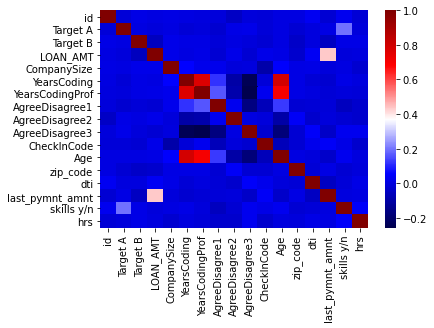

In [107]:
sns.heatmap(df.corr(), annot = False, cmap = 'seismic')

In [108]:
df.corr()

,id,Target A,Target B,LOAN_AMT,CompanySize,YearsCoding,YearsCodingProf,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,CheckInCode,Age,zip_code,dti,last_pymnt_amnt,skills y/n,hrs
id,1.000000,-0.010424,0.017360,0.004329,0.011000,0.005848,0.001767,-0.004702,-0.044869,-0.002566,-0.011170,0.004059,0.008035,0.037443,-0.021086,0.029560,-0.014163
Target A,-0.010424,1.000000,0.007766,-0.005426,0.003971,-0.011682,-0.002411,-0.022783,0.014924,0.020445,-0.010110,0.007666,-0.019511,0.002491,0.009170,0.195064,-0.004422
Target B,0.017360,0.007766,1.000000,-0.053278,0.020110,0.009649,0.009920,-0.008969,0.006678,-0.002937,-0.016855,0.003313,-0.036506,0.001063,-0.049296,0.013663,0.013196
LOAN_AMT,0.004329,-0.005426,-0.053278,1.000000,0.020405,0.007861,0.017916,-0.019232,0.018441,-0.018539,0.022896,0.010352,-0.030630,0.038297,0.435464,-0.001761,0.002300
CompanySize,0.011000,0.003971,0.020110,0.020405,1.000000,0.058738,0.024480,0.027598,-0.002840,-0.001338,-0.092466,0.056996,0.009924,0.017449,-0.004652,0.005612,-0.023516
YearsCoding,0.005848,-0.011682,0.009649,0.007861,0.058738,1.000000,0.773309,0.118470,-0.098320,-0.240996,-0.008423,0.789597,0.012117,-0.015270,-0.023049,0.015687,-0.000008
YearsCodingProf,0.001767,-0.002411,0.009920,0.017916,0.024480,0.773309,1.000000,0.163089,-0.086091,-0.256969,0.031439,0.708721,0.010364,-0.001102,-0.016193,-0.002557,-0.009149
AgreeDisagree1,-0.004702,-0.022783,-0.008969,-0.019232,0.027598,0.118470,0.163089,1.000000,0.031774,-0.164274,-0.060701,0.126839,-0.017777,-0.016239,-0.011239,-0.052742,-0.029578
AgreeDisagree2,-0.044869,0.014924,0.006678,0.018441,-0.002840,-0.098320,-0.086091,0.031774,1.000000,0.007267,-0.005813,-0.097387,0.042964,-0.026928,-0.003058,-0.018533,-0.027016
AgreeDisagree3,-0.002566,0.020445,-0.002937,-0.018539,-0.001338,-0.240996,-0.256969,-0.164274,0.007267,1.000000,-0.022262,-0.175388,-0.016417,0.047640,-0.040142,0.030250,0.030753


In [109]:
df['Business Title'] = df['Business Title'].apply(lambda x: x.split(' '))

In [110]:
def remove(string):
    return string.replace(" ", "")
def find_bustitle(list_):
    for i in list_:
        j = remove(i.lower())
        if(j == 'engineer'):
            k = 'engineer'
        elif(j == 'manager'):
            k = 'manager'   
        elif(j == 'aide'): 
            k = 'assistant'
        elif(j == 'investigator'):  
            k = 'investigator'
        elif(j == 'maintainer'):
            k = 'maintainer'  
        elif(j == 'attorney'):
            k = 'attorney'   
        elif(j == 'specialist'):
            k = 'specialist'  
        elif(j == 'analyst'):
            k = 'analyst'  
        elif(j == 'director'):
            k = 'director'  
        elif(j == 'assistant'):
            k = 'assistant'
        elif(j == 'scientist'): 
            k = 'scientist'
        elif(j == 'coordinator'): 
            k = 'coordinator'
        elif(j == 'technician'): 
            k = 'technician'
        elif(j == 'representative'): 
            k = 'representative'
        elif(j == 'support'): 
            k = 'support'
        elif(j == 'inspector'): 
            k = 'inspector' 
        elif(j == 'developer'): 
            k = 'developer'
        elif(j == 'supervisor'):
            k = 'supervisor'
        elif(j == 'secretary'):
            k = 'secretary'
        elif(j == 'advisor'):
            k = 'advisor'
        elif(j == 'executive'):
            k = 'executive'
        elif(j == 'intern'):
            k = 'intern'
        elif(j == 'associate'):
            k = 'associate'
        elif(j == 'deputy'):
            k = 'deputy'
        else: 
            k = 'others'                   
             
    return k

In [111]:
df['bustitle'] = df['Business Title'].apply(find_bustitle)

In [112]:
df.bustitle.value_counts()

others            1614
manager            271
analyst            191
engineer           135
specialist         107
assistant           86
coordinator         79
director            61
investigator        58
attorney            51
developer           42
associate           38
intern              36
supervisor          34
inspector           30
maintainer          27
advisor             19
technician          16
representative      14
scientist           11
executive           10
support             10
secretary            6
Name: bustitle, dtype: int64

In [113]:
df['Civil Service Title'] = df['Civil Service Title'].apply(lambda x: x.split(' '))

In [114]:
df['cstitle'] = df['Civil Service Title'].apply(find_bustitle)

In [115]:
df['cstitle'].value_counts()

others          1449
manager          277
engineer         242
coordinator      186
associate        141
analyst          139
attorney         112
specialist       111
scientist         83
assistant         56
investigator      50
maintainer        31
technician        27
intern            24
inspector         16
director           2
Name: cstitle, dtype: int64

In [116]:
df['Minimum Qual Requirements'].isnull().sum()

20

In [117]:
df['Additional Information'].isnull().sum()

1092

In [118]:
df.loc[~df['Additional Information'].isnull(), 'addinfo y/n'] = 1
df.loc[df['Additional Information'].isnull(), 'addinfo y/n'] = 0

In [119]:
df['addinfo y/n'].value_counts()

1.0    1854
0.0    1092
Name: addinfo y/n, dtype: int64

In [120]:
df['Residency Requirement'].isnull().sum()

4

In [121]:
df['Residency Requirement'] = df['Residency Requirement'].apply(lambda x: str(x).split(' ')[0])

In [122]:
df['Residency Requirement'].value_counts()

New          2625
NYCHA         231
Residency      28
This           19
City            8
NYC             8
The             7
nan             4
**A             2
019New          2
PLEASE          2
Must            2
Applicant       2
Note:           2
NEW             2
:               2
Name: Residency Requirement, dtype: int64

In [123]:
df.loc[df['Residency Requirement'] == 'New', 'RR y/n'] = 1
df.loc[df['Residency Requirement'] == 'NYCHA', 'RR y/n'] = 0
df.loc[df['Residency Requirement'] == 'Residency', 'RR y/n'] = 1
df.loc[df['Residency Requirement'] == 'This', 'RR y/n'] = 0
df.loc[df['Residency Requirement'] == 'NYC', 'RR y/n'] = 1
df.loc[df['Residency Requirement'] == 'City', 'RR y/n'] = 0
df.loc[df['Residency Requirement'] == 'The', 'RR y/n'] = 1
df.loc[df['Residency Requirement'] == 'nan', 'RR y/n'] = 1
df.loc[df['Residency Requirement'] == 'Must', 'RR y/n'] = 1
df.loc[df['Residency Requirement'] == 'Applicant', 'RR y/n'] = 1
df.loc[df['Residency Requirement'] == 'PLEASE', 'RR y/n'] = 1
df.loc[df['Residency Requirement'] == 'Note:', 'RR y/n'] = 0
df.loc[df['Residency Requirement'] == 'NEW', 'RR y/n'] = 1
df.loc[df['Residency Requirement'] == '**A', 'RR y/n'] = 1
df.loc[df['Residency Requirement'] == '019New', 'RR y/n'] = 0
df.loc[df['Residency Requirement'] == ':', 'RR y/n'] = 1




In [124]:
df['RR y/n'].value_counts()

1.0    2684
0.0     262
Name: RR y/n, dtype: int64

In [125]:
df['DevType'].isnull().sum()

45

In [126]:
df['DevType'] = df['DevType'].apply(lambda x: str(x).split(';'))

In [127]:
set(itertools.chain.from_iterable(df.DevType)) 

{'Back-end developer',
 'C-suite executive (CEO, CTO, etc.)',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'Desktop or enterprise applications developer',
 'DevOps specialist',
 'Educator or academic researcher',
 'Embedded applications or devices developer',
 'Engineering manager',
 'Front-end developer',
 'Full-stack developer',
 'Game or graphics developer',
 'Marketing or sales professional',
 'Mobile developer',
 'Product manager',
 'QA or test developer',
 'Student',
 'System administrator',
 'nan'}

In [128]:
def find_dev(list_):
    for i in list_:
        if ('developer' in i.split(' ')):
            k = 1
        else:
            k = 0
        return k    
def find_exec(list_):
    for i in list_:
        if ('executive' in i.split(' ')):
            k = 1
        else:
            k = 0 
        return k   
def find_ana(list_):
    for i in list_:
        if ('analyst' in i.split(' ')):
            k = 1
        else:
            k = 0 
        return k
def find_sci(list_):
    for i in list_:
        if ('scientist' in i.split(' ')) | ('researcher' in i.split(' ')):
            k = 1
        else:
            k = 0 
        return k
def find_admin(list_):
    for i in list_:
        if ('administrator' in i.split(' ')):
            k = 1
        else:
            k = 0 
        return k
def find_des(list_):
    for i in list_:
        if ('design' in i.split(' ')):
            k = 1
        else:
            k = 0 
        return k
def find_spec(list_):
    for i in list_:
        if ('specialist' in i.split(' ')):
            k = 1
        else:
            k = 0 
        return k
def find_man(list_):
    for i in list_:
        if ('manager' in i.split(' ')):
            k = 1
        else:
            k = 0 
        return k
def find_sales(list_):
    for i in list_:
        if ('sales' in i.split(' ')):
            k = 1
        else:
            k = 0 
        return k
def find_stu(list_):
    for i in list_:
        if ('student' in i.split(' ')):
            k = 1
        else:
            k = 0 
        return k        


In [129]:
df['dev_devt'] = df['DevType'].apply(find_dev)
df['exec_devt'] = df['DevType'].apply(find_exec)
df['ana_devt'] = df['DevType'].apply(find_ana)
df['sci_devt'] = df['DevType'].apply(find_sci)
df['admin_devt'] = df['DevType'].apply(find_admin)
df['des_devt'] = df['DevType'].apply(find_des)
df['spec_devt'] = df['DevType'].apply(find_spec)
df['man_devt'] = df['DevType'].apply(find_man)
df['sales_devt'] = df['DevType'].apply(find_sales)
df['stu_devt'] = df['DevType'].apply(find_stu)




In [130]:
df['CommunicationTools'].isnull().sum()

923

In [131]:
df['CommunicationTools'] = df['CommunicationTools'].apply(lambda x: str(x).split(';'))

In [132]:
set(itertools.chain.from_iterable(df.CommunicationTools)) 

{'Confluence',
 'Facebook',
 'Google Hangouts/Chat',
 'HipChat',
 'Jira',
 'Office / productivity suite (Microsoft Office, Google Suite, etc.)',
 'Other chat system (IRC, proprietary software, etc.)',
 'Other wiki tool (Github, Google Sites, proprietary software, etc.)',
 'Slack',
 'Stack Overflow Enterprise',
 'Trello',
 'nan'}

In [133]:
def find_conf(list_):
    for i in list_:
        if ('Confluence' in list_):
            k = 1
        else:
            k = 0
        return k
def find_face(list_):
    for i in list_:
        if ('Facebook' in list_):
            k = 1
        else:
            k = 0
        return k
def find_hang(list_):
    for i in list_:
        if ('Google Hangouts/Chat' in list_):
            k = 1
        else:
            k = 0
        return k
def find_hip(list_):
    for i in list_:
        if ('HipChat' in list_):
            k = 1
        else:
            k = 0
        return k
def find_jira(list_):
    for i in list_:
        if ('Jira' in list_):
            k = 1
        else:
            k = 0
        return k
def find_off(list_):
    for i in list_:
        if ('Office / productivity suite (Microsoft Office, Google Suite, etc.)' in list_):
            k = 1
        else:
            k = 0
        return k
def find_otch(list_):
    for i in list_:
        if ('Other chat system (IRC, proprietary software, etc.)' in list_):
            k = 1
        else:
            k = 0
        return k
def find_otwi(list_):
    for i in list_:
        if ('Other wiki tool (Github, Google Sites, proprietary software, etc.)' in list_):
            k = 1
        else:
            k = 0
        return k
def find_sla(list_):
    for i in list_:
        if ('Slack' in list_):
            k = 1
        else:
            k = 0
        return k
def find_over(list_):
    for i in list_:
        if ('Stack Overflow Enterprise' in list_):
            k = 1
        else:
            k = 0
        return k
def find_trel(list_):
    for i in list_:
        if ('Trello' in list_):
            k = 1
        else:
            k = 0
        return k

In [134]:
df['comm_conf'] = df['CommunicationTools'].apply(find_conf)
df['comm_face'] = df['CommunicationTools'].apply(find_face)
df['comm_hang'] = df['CommunicationTools'].apply(find_hang)
df['comm_hip'] = df['CommunicationTools'].apply(find_hip)
df['comm_jira'] = df['CommunicationTools'].apply(find_jira)
df['comm_off'] = df['CommunicationTools'].apply(find_off)
df['comm_otch'] = df['CommunicationTools'].apply(find_otch)
df['comm_otwi'] = df['CommunicationTools'].apply(find_otwi)
df['comm_sla'] = df['CommunicationTools'].apply(find_sla)
df['comm_over'] = df['CommunicationTools'].apply(find_over)
df['comm_trel'] = df['CommunicationTools'].apply(find_trel)



In [135]:
df['EducationTypes'] = df['EducationTypes'].apply(lambda x: str(x).split(";"))

In [136]:
set(itertools.chain.from_iterable(df.EducationTypes)) 

{'Completed an industry certification program (e.g. MCPD)',
 'Contributed to open source software',
 'Participated in a full-time developer training program or bootcamp',
 'Participated in a hackathon',
 'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)',
 'Received on-the-job training in software development',
 'Taken a part-time in-person course in programming or software development',
 'Taken an online course in programming or software development (e.g. a MOOC)',
 'Taught yourself a new language, framework, or tool without taking a formal course',
 'nan'}

In [137]:
def find_comp(list_):
    for i in list_:
        if ('Completed an industry certification program (e.g. MCPD)' in list_):
            k = 1
        else:
            k = 0
        return k
def find_contri(list_):
    for i in list_:
        if ('Contributed to open source software' in list_):
            k = 1
        else:
            k = 0
        return k
def find_ftd(list_):
    for i in list_:
        if ('Participated in a full-time developer training program or bootcamp' in list_):
            k = 1
        else:
            k = 0
        return k
def find_hack(list_):
    for i in list_:
        if ('Participated in a hackathon' in list_):
            k = 1
        else:
            k = 0
        return k
def find_occ(list_):
    for i in list_:
        if ('Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)' in list_):
            k = 1
        else:
            k = 0
        return k
def find_otj(list_):
    for i in list_:
        if ('Received on-the-job training in software development' in list_):
            k = 1
        else:
            k = 0
        return k
def find_ptc(list_):
    for i in list_:
        if ('Taken a part-time in-person course in programming or software development' in list_):
            k = 1
        else:
            k = 0
        return k
def find_mooc(list_):
    for i in list_:
        if ('Taken an online course in programming or software development (e.g. a MOOC)' in list_):
            k = 1
        else:
            k = 0
        return k
def find_self(list_):
    for i in list_:
        if ('Taught yourself a new language, framework, or tool without taking a formal course' in list_):
            k = 1
        else:
            k = 0
        return k

In [138]:
df['et_comp'] = df['EducationTypes'].apply(find_comp)
df['et_contri'] = df['EducationTypes'].apply(find_contri)
df['et_ftd'] = df['EducationTypes'].apply(find_ftd)
df['et_hack'] = df['EducationTypes'].apply(find_hack)
df['et_occ'] = df['EducationTypes'].apply(find_occ)
df['et_otj'] = df['EducationTypes'].apply(find_otj)
df['et_ptc'] = df['EducationTypes'].apply(find_ptc)
df['et_mooc'] = df['EducationTypes'].apply(find_mooc)
df['et_self'] = df['EducationTypes'].apply(find_self)



In [139]:
df['SelfTaughtTypes'].isnull().sum()

1134

In [140]:
df['SelfTaughtTypes'] = df['SelfTaughtTypes'].apply(lambda x: str(x).split(";"))

In [141]:
set(itertools.chain.from_iterable(df.SelfTaughtTypes)) 

{'A book or e-book from O’Reilly, Apress, or a similar publisher',
 'A college/university computer science or software engineering book',
 'Internal Wikis, chat rooms, or documentation set up by my company for employees',
 'Online developer communities other than Stack Overflow (ex. forums, listservs, IRC channels, etc.)',
 'Pre-scheduled tutoring or mentoring sessions with a friend or colleague',
 'Questions & answers on Stack Overflow',
 'Tapping your network of friends, family, and peers versed in the technology',
 'The official documentation and/or standards for the technology',
 'The technology’s online help system',
 'nan'}

In [142]:
def find_book(list_):
    for i in list_:
        if ('A book or e-book from O’Reilly, Apress, or a similar publisher' in list_):
            k = 1
        else:
            k = 0
        return k
def find_uni(list_):
    for i in list_:
        if ('A college/university computer science or software engineering book' in list_):
            k = 1
        else:
            k = 0
        return k
def find_wiki(list_):
    for i in list_:
        if ('Internal Wikis, chat rooms, or documentation set up by my company for employees' in list_):
            k = 1
        else:
            k = 0
        return k
def find_tut(list_):
    for i in list_:
        if ('Pre-scheduled tutoring or mentoring sessions with a friend or colleague' in list_):
            k = 1
        else:
            k = 0
        return k
def find_so(list_):
    for i in list_:
        if ('Questions & answers on Stack Overflow' in list_):
            k = 1
        else:
            k = 0
        return k
def find_tap(list_):
    for i in list_:
        if ('Tapping your network of friends, family, and peers versed in the technology' in list_):
            k = 1
        else:
            k = 0
        return k
def find_irc(list_):
    for i in list_:
        if ('Online developer communities other than Stack Overflow (ex. forums, listservs, IRC channels, etc.)' in list_):
            k = 1
        else:
            k = 0
        return k
def find_doc(list_):
    for i in list_:
        if ('The official documentation and/or standards for the technology' in list_):
            k = 1
        else:
            k = 0
        return k
def find_tohs(list_):
    for i in list_:
        if ('The technology’s online help system' in list_):
            k = 1
        else:
            k = 0
        return k

In [143]:
df['stt_book'] = df['SelfTaughtTypes'].apply(find_book)
df['stt_uni'] = df['SelfTaughtTypes'].apply(find_uni)
df['stt_wiki'] = df['SelfTaughtTypes'].apply(find_wiki)
df['stt_tut'] = df['SelfTaughtTypes'].apply(find_tut)
df['stt_so'] = df['SelfTaughtTypes'].apply(find_so)
df['stt_tap'] = df['SelfTaughtTypes'].apply(find_tap)
df['stt_irc'] = df['SelfTaughtTypes'].apply(find_irc)
df['stt_doc'] = df['SelfTaughtTypes'].apply(find_doc)
df['stt_tohs'] = df['SelfTaughtTypes'].apply(find_tohs)


In [144]:
df['LanguageWorkedWith'].isnull().sum()

499

In [145]:
df['LanguageWorkedWith'] = df['LanguageWorkedWith'].apply(lambda x: str(x).split(";"))

In [146]:
set(itertools.chain.from_iterable(df.LanguageWorkedWith)) 

{'Assembly',
 'Bash/Shell',
 'C',
 'C#',
 'C++',
 'CSS',
 'Clojure',
 'Cobol',
 'CoffeeScript',
 'Delphi/Object Pascal',
 'Erlang',
 'F#',
 'Go',
 'Groovy',
 'HTML',
 'Hack',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Lua',
 'Matlab',
 'Objective-C',
 'Ocaml',
 'PHP',
 'Perl',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Swift',
 'TypeScript',
 'VB.NET',
 'VBA',
 'Visual Basic 6',
 'nan'}

In [147]:
def py(list_):
    for i in list_:
        if ('Python' in list_):
            k = 1
        else:
            k = 0
        return k
def js(list_):
    for i in list_:
        if ('JavaScript' in list_):
            k = 1
        else:
            k = 0
        return k
def java(list_):
    for i in list_:
        if ('Java' in list_):
            k = 1
        else:
            k = 0
        return k
def ch(list_):
    for i in list_:
        if ('C#' in list_):
            k = 1
        else:
            k = 0
        return k
def c(list_):
    for i in list_:
        if ('C' in list_):
            k = 1
        else:
            k = 0
        return k
def cpp(list_):
    for i in list_:
        if ('C++' in list_):
            k = 1
        else:
            k = 0
        return k
def go(list_):
    for i in list_:
        if ('Go' in list_):
            k = 1
        else:
            k = 0
        return k
def r(list_):
    for i in list_:
        if ('R' in list_):
            k = 1
        else:
            k = 0
        return k
def swift(list_):
    for i in list_:
        if ('Swift' in list_):
            k = 1
        else:
            k = 0
        return k
def php(list_):
    for i in list_:
        if ('PHP' in list_):
            k = 1
        else:
            k = 0
        return k

In [148]:
df['lww_py'] = df['LanguageWorkedWith'].apply(py)
df['lww_js'] = df['LanguageWorkedWith'].apply(js)
df['lww_java'] = df['LanguageWorkedWith'].apply(java)
df['lww_ch'] = df['LanguageWorkedWith'].apply(ch)
df['lww_c'] = df['LanguageWorkedWith'].apply(c)
df['lww_cpp'] = df['LanguageWorkedWith'].apply(cpp)
df['lww_go'] = df['LanguageWorkedWith'].apply(go)
df['lww_r'] = df['LanguageWorkedWith'].apply(r)
df['lww_swift'] = df['LanguageWorkedWith'].apply(swift)
df['lww_php'] = df['LanguageWorkedWith'].apply(php)


In [149]:
df['DatabaseWorkedWith'].isnull().sum()
df['DatabaseWorkedWith'] = df['DatabaseWorkedWith'].apply(lambda x: str(x).split(';'))
set(itertools.chain.from_iterable(df.DatabaseWorkedWith))

{'Amazon DynamoDB',
 'Amazon RDS/Aurora',
 'Amazon Redshift',
 'Apache HBase',
 'Apache Hive',
 'Cassandra',
 'Elasticsearch',
 'Google BigQuery',
 'Google Cloud Storage',
 'IBM Db2',
 'MariaDB',
 'Memcached',
 'Microsoft Azure (Tables, CosmosDB, SQL, etc)',
 'MongoDB',
 'MySQL',
 'Neo4j',
 'Oracle',
 'PostgreSQL',
 'Redis',
 'SQL Server',
 'SQLite',
 'nan'}

In [150]:
def SQLServer(list_):
    for i in list_:
        if ('SQL Server' in list_):
            k = 1
        else:
            k = 0
        return k
def MySQL(list_):
    for i in list_:
        if ('MySQL' in list_):
            k = 1
        else:
            k = 0
        return k
def Cassandra(list_):
    for i in list_:
        if ('Cassandra' in list_):
            k = 1
        else:
            k = 0
        return k
def Elasticsearch(list_):
    for i in list_:
        if ('Elasticsearch' in list_):
            k = 1
        else:
            k = 0
        return k
def PostgreSQL(list_):
    for i in list_:
        if ('PostgreSQL' in list_):
            k = 1
        else:
            k = 0
        return k

In [151]:
df['dww_SQLServer'] = df['DatabaseWorkedWith'].apply(SQLServer)
df['dww_MySQL'] = df['DatabaseWorkedWith'].apply(MySQL)
df['dww_Cassandra'] = df['DatabaseWorkedWith'].apply(Cassandra)
df['dww_Elasticsearch'] = df['DatabaseWorkedWith'].apply(Elasticsearch)
df['dww_PostgreSQL'] = df['DatabaseWorkedWith'].apply(PostgreSQL)


In [152]:
df['PlatformWorkedWith'].isnull().sum()

876

In [153]:
df['PlatformWorkedWith'].value_counts()
df['PlatformWorkedWith'] = df['PlatformWorkedWith'].apply(lambda x: str(x).split(';'))

In [154]:
set(itertools.chain.from_iterable(df['PlatformWorkedWith']))

{'AWS',
 'Amazon Echo',
 'Android',
 'Apple Watch or Apple TV',
 'Arduino',
 'Azure',
 'Drupal',
 'ESP8266',
 'Firebase',
 'Gaming console',
 'Google Cloud Platform/App Engine',
 'Google Home',
 'Heroku',
 'IBM Cloud or Watson',
 'Linux',
 'Mac OS',
 'Mainframe',
 'Predix',
 'Raspberry Pi',
 'Salesforce',
 'Serverless',
 'SharePoint',
 'Windows Desktop or Server',
 'Windows Phone',
 'WordPress',
 'iOS',
 'nan'}

In [155]:
def Android(list_):
    for i in list_:
        if ('Android' in list_):
            k = 1
        else:
            k = 0
        return k
def Linux(list_):
    for i in list_:
        if ('Linux' in list_):
            k = 1
        else:
            k = 0
        return k
def Mac(list_):
    for i in list_:
        if ('Mac OS' in list_):
            k = 1
        else:
            k = 0
        return k
def Windows(list_):
    for i in list_:
        if ('Windows Desktop or Server' in list_) | ('Windows Phone' in list_):
            k = 1
        else:
            k = 0
        return k
def Google(list_):
    for i in list_:
        if ('Google Cloud Platform/App Engine' in list_) | ('Google Home' in list_):
            k = 1
        else:
            k = 0
        return k

In [156]:
df['pww_Android'] = df['PlatformWorkedWith'].apply(Android)
df['pww_Linux'] = df['PlatformWorkedWith'].apply(Linux)
df['pww_Mac'] = df['PlatformWorkedWith'].apply(Mac)
df['pww_Windows'] = df['PlatformWorkedWith'].apply(Windows)
df['pww_Google'] = df['PlatformWorkedWith'].apply(Google)


In [157]:
df['FrameworkWorkedWith'].isnull().sum()

1313

In [158]:
df['FrameworkWorkedWith'].value_counts()
df['FrameworkWorkedWith'] = df['FrameworkWorkedWith'].apply(lambda x: str(x).split(';'))

In [159]:
set(itertools.chain.from_iterable(df.FrameworkWorkedWith))

{'.NET Core',
 'Angular',
 'Cordova',
 'Django',
 'Hadoop',
 'Node.js',
 'React',
 'Spark',
 'Spring',
 'TensorFlow',
 'Torch/PyTorch',
 'Xamarin',
 'nan'}

In [160]:
def React(list_):
    for i in list_:
        if ('React' in list_):
            k = 1
        else:
            k = 0
        return k
def Angular(list_):
    for i in list_:
        if ('Angular' in list_):
            k = 1
        else:
            k = 0
        return k
def Django(list_):
    for i in list_:
        if ('Django' in list_):
            k = 1
        else:
            k = 0
        return k
def Cordova(list_):
    for i in list_:
        if ('Cordova' in list_):
            k = 1
        else:
            k = 0
        return k
def Spark(list_):
    for i in list_:
        if ('Spark' in list_):
            k = 1
        else:
            k = 0
        return k

In [161]:
df['fww_React'] = df['FrameworkWorkedWith'].apply(React)
df['fww_Angular'] = df['FrameworkWorkedWith'].apply(Angular)
df['fww_Django'] = df['FrameworkWorkedWith'].apply(Django)
df['fww_Cordova'] = df['FrameworkWorkedWith'].apply(Cordova)
df['fww_Spark'] = df['FrameworkWorkedWith'].apply(Spark)


In [162]:
df['IDE'].isnull().sum()

586

In [163]:
df['IDE'] = df['IDE'].apply(lambda x: str(x).split(';'))
set(itertools.chain.from_iterable(df.IDE))

{'Android Studio',
 'Atom',
 'Coda',
 'Eclipse',
 'Emacs',
 'IPython / Jupyter',
 'IntelliJ',
 'Komodo',
 'Light Table',
 'NetBeans',
 'Notepad++',
 'PHPStorm',
 'PyCharm',
 'RStudio',
 'RubyMine',
 'Sublime Text',
 'TextMate',
 'Vim',
 'Visual Studio',
 'Visual Studio Code',
 'Xcode',
 'Zend',
 'nan'}

In [164]:
def VSCode(list_):
    for i in list_:
        if ('Visual Studio Code' in list_):
            k = 1
        else:
            k = 0
        return k
def Eclipse(list_):
    for i in list_:
        if ('Eclipse' in list_):
            k = 1
        else:
            k = 0
        return k
def Studio(list_):
    for i in list_:
        if ('Android Studio' in list_):
            k = 1
        else:
            k = 0
        return k
def Vim(list_):
    for i in list_:
        if ('Vim' in list_):
            k = 1
        else:
            k = 0
        return k
def NetBeans(list_):
    for i in list_:
        if ('NetBeans' in list_):
            k = 1
        else:
            k = 0
        return k

In [165]:
df['ide_VSCode'] = df['IDE'].apply(VSCode)
df['ide_Eclipse'] = df['IDE'].apply(Eclipse)
df['ide_Studio'] = df['IDE'].apply(Studio)
df['ide_Vim'] = df['IDE'].apply(Vim)
df['ide_NetBeans'] = df['IDE'].apply(NetBeans)


In [166]:
df['Methodology'].isnull().sum()

955

In [167]:
df['Methodology'].value_counts()
df['Methodology'] = df['Methodology'].apply(lambda x: str(x).split(';'))
set(itertools.chain.from_iterable(df.Methodology))

{'Agile',
 'Evidence-based software engineering',
 'Extreme programming (XP)',
 'Formal standard such as ISO 9001 or IEEE 12207 (aka “waterfall” methodologies)',
 'Kanban',
 'Lean',
 'Mob programming',
 'PRINCE2',
 'Pair programming',
 'Scrum',
 'nan'}

In [168]:
def Agile(list_):
    for i in list_:
        if ('Agile' in list_):
            k = 1
        else:
            k = 0
        return k
def Lean(list_):
    for i in list_:
        if ('Lean' in list_):
            k = 1
        else:
            k = 0
        return k
def Extreme(list_):
    for i in list_:
        if ('Extreme programming (XP)' in list_):
            k = 1
        else:
            k = 0
        return k
def Scrum(list_):
    for i in list_:
        if ('Scrum' in list_):
            k = 1
        else:
            k = 0
        return k
def Formal(list_):
    for i in list_:
        if ('Formal standard such as ISO 9001 or IEEE 12207 (aka “waterfall” methodologies)' in list_):
            k = 1
        else:
            k = 0
        return k

In [169]:
df['meth_agile'] = df['Methodology'].apply(Agile)
df['meth_lean'] = df['Methodology'].apply(Lean)
df['meth_extreme'] = df['Methodology'].apply(Extreme)
df['meth_scrum'] = df['Methodology'].apply(Scrum)
df['meth_formal'] = df['Methodology'].apply(Formal)


In [170]:
df['VersionControl'].isnull().sum()

614

In [171]:
df['VersionControl'].value_counts()
df['VersionControl'] = df['VersionControl'].apply(lambda x: str(x).split(';'))
set(itertools.chain.from_iterable(df.VersionControl))

{'Copying and pasting files to network shares',
 'Git',
 "I don't use version control",
 'Mercurial',
 'Subversion',
 'Team Foundation Version Control',
 'Zip file back-ups',
 'nan'}

In [172]:
def Copying(list_):
    for i in list_:
        if ('Copying and pasting files to network shares' in list_):
            k = 1
        else:
            k = 0
        return k
def Git(list_):
    for i in list_:
        if ('Git' in list_):
            k = 1
        else:
            k = 0
        return k
def Mercurial(list_):
    for i in list_:
        if ('Mercurial' in list_):
            k = 1
        else:
            k = 0
        return k
def Subversion(list_):
    for i in list_:
        if ('Subversion' in list_):
            k = 1
        else:
            k = 0
        return k
def Team(list_):
    for i in list_:
        if ('Team Foundation Version Control' in list_):
            k = 1
        else:
            k = 0
        return k
def Zip(list_):
    for i in list_:
        if ('Zip file back-ups' in list_):
            k = 1
        else:
            k = 0
        return k

In [173]:
df['vc_Copying'] = df['VersionControl'].apply(Copying)
df['vc_Git'] = df['VersionControl'].apply(Git)
df['vc_Mercurial'] = df['VersionControl'].apply(Mercurial)
df['vc_Subversion'] = df['VersionControl'].apply(Subversion)
df['vc_Team'] = df['VersionControl'].apply(Team)
df['vc_Zip'] = df['VersionControl'].apply(Zip)



In [174]:
df.shape

(2946, 156)